In [136]:
#Basic libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import sklearn 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

#Deep learning libraries
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [137]:
fake_news = pd.read_csv("Fake.csv")
true_news = pd.read_csv("True.csv")

In [138]:
print ("The shape of the  data is (row, column):"+ str(fake_news.shape))
print (fake_news.info())
print("\n --------------------------------------- \n")

The shape of the  data is (row, column):(23481, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None

 --------------------------------------- 



In [139]:
# print shape of true dataset with rows and columns and information
print ("The shape of the  data is (row, column):"+ str(true_news.shape))
print (true_news.info())

The shape of the  data is (row, column):(21417, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


In [140]:
true_news.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [141]:
#Target variable for fake news
fake_news['output']=0

#Target variable for true news
true_news['output']=1

In [142]:
true_news.head(10)

,title,text,subject,date,output
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",1
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",1


In [143]:
fake_news['date'].value_counts()

May 10, 2017        46
May 26, 2016        44
May 5, 2016         44
May 6, 2016         44
May 11, 2016        43
                    ..
14-Feb-18            1
Jul 19, 2015         1
December 4, 2017     1
October 22, 2017     1
Apr 2, 2015          1
Name: date, Length: 1681, dtype: int64

In [144]:
#Removing links and the headline from the date column
fake_news=fake_news[~fake_news.date.str.contains("http")]
fake_news=fake_news[~fake_news.date.str.contains("HOST")]

'''You can also execute the below code to get the result 
which allows only string which has the months and rest are filtered'''
fake_news=fake_news[fake_news.date.str.contains("Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec")]

In [145]:
fake_news.head(5)

,title,text,subject,date,output
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [146]:
#Converting the date to datetime format
fake_news['date'] = pd.to_datetime(fake_news['date'])
true_news['date'] = pd.to_datetime(true_news['date'])

In [147]:
frames = [fake_news, true_news]
news_dataset = pd.concat(frames)
news_dataset

,title,text,subject,date,output
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,1


In [170]:
news_dataset.shape

(44888, 5)

In [148]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text
news_dataset["text"] = news_dataset["text"].apply(wordopt)

In [149]:
news_dataset.head(10)

,title,text,subject,date,output
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,News,2017-12-31,0
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,2017-12-31,0
2,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauk...,News,2017-12-30,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that ...,News,2017-12-29,0
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,2017-12-25,0
5,Racist Alabama Cops Brutalize Black Boy While...,the number of cases of cops brutalizing and ki...,News,2017-12-25,0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",donald trump spent a good portion of his day a...,News,2017-12-23,0
7,Trump Said Some INSANELY Racist Stuff Inside ...,in the wake of yet another court decision that...,News,2017-12-23,0
8,Former CIA Director Slams Trump Over UN Bully...,many people have raised the alarm regarding th...,News,2017-12-22,0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,just when you might have thought we d get a br...,News,2017-12-21,0


In [150]:
stop = stopwords.words('english')
news_dataset['text'] = news_dataset['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
news_dataset.head()

,title,text,subject,date,output
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,News,2017-12-31,0
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,2017-12-31,0
2,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,News,2017-12-30,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would bac...,News,2017-12-29,0
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,News,2017-12-25,0


In [151]:
#Extracting 'reviews' for processing
news_features=news_dataset.copy()
news_features=news_features[['text']].reset_index(drop=True)
news_features.head()

,text
0,donald trump wish americans happy new year lea...
1,house intelligence committee chairman devin nu...
2,friday revealed former milwaukee sheriff david...
3,christmas day donald trump announced would bac...
4,pope francis used annual christmas day message...


In [152]:
stop_words = set(stopwords.words("english"))
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(news_features)):
    news = re.sub('[^a-zA-Z]', ' ', news_features['text'][i])
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop_words]
    news = ' '.join(news)
    corpus.append(news)#Getting the target variable

In [153]:
y=news_dataset['output']
corpus[0]

'donald trump wish american happi new year leav instead give shout enemi hater dishonest fake news media former realiti show star one job countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news media happi healthi new year presid angri pant tweet great year america countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news media happi healthi new year great year america donald j trump realdonaldtrump decemb tweet went welll expect kind presid send new year greet like despic petti infantil gibberish trump lack decenc even allow rise gutter long enough wish american citizen happi new year bishop talbert swan talbertswan decemb one like calvin calvinstowel decemb impeach would make great year america also accept regain control congress miranda yaver mirandayav decemb hear talk includ mani peopl hate wonder hate alan sandov decemb use word hater new year wish marlen decemb say happi new year koren pollitt 

In [154]:
#Setting up vocabulary size
voc_size=5000

#One hot encoding 
onehot_repr=[one_hot(words,voc_size)for words in corpus]

In [156]:
#Setting sentence length
sent_length=30

#Padding the sentences
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)

In [157]:
print(embedded_docs[0])
print(embedded_docs)

[1537 3792 3587 4034 3134 2363 3555  742 2771 3134 4896  964  549 2949
 1569 2050 2434 1269 1944 3555  742 2746 2050 3555 1510 3347 2530 2839
 4387 1381]
[[1537 3792 3587 ... 2839 4387 1381]
 [3895   94 4883 ... 2479 4387 1381]
 [2092 3625   94 ... 3911 4387 1381]
 ...
 [2737 1660 1982 ... 2637 1438 1206]
 [ 240  299 1692 ... 2414 1832 1143]
 [3853 1066 2059 ... 4102 4776 1882]]


In [158]:
#Creating the lstm model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100)) #Adding 100 lstm neurons in the layer
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
#Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 30, 40)            200000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 40)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [159]:
# Converting the X and y as array
X_final=np.array(embedded_docs)
y_final=np.array(y)

#Check shape of X and y final
X_final.shape,y_final.shape

((44888, 30), (44888,))

In [160]:
# Train test split of the X and y final
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.20, random_state=42)
# X_train.shape, y_train.shape,y_test.shape
X_test.shape, y_test.shape

((8978, 30), (8978,))

In [161]:
# Fitting with 10 epochs and 64 batch size
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
562/562 [==============================] - 33s 60ms/step - loss: 0.1886 - accuracy: 0.9202 - val_loss: 0.1060 - val_accuracy: 0.9613
Epoch 2/10
562/562 [==============================] - 31s 56ms/step - loss: 0.0892 - accuracy: 0.9687 - val_loss: 0.0956 - val_accuracy: 0.9659
Epoch 3/10
562/562 [==============================] - 31s 56ms/step - loss: 0.0635 - accuracy: 0.9784 - val_loss: 0.1005 - val_accuracy: 0.9668
Epoch 4/10
562/562 [==============================] - 31s 54ms/step - loss: 0.0499 - accuracy: 0.9830 - val_loss: 0.1016 - val_accuracy: 0.9669
Epoch 5/10
562/562 [==============================] - 31s 55ms/step - loss: 0.0386 - accuracy: 0.9872 - val_loss: 0.1199 - val_accuracy: 0.9663
Epoch 6/10
562/562 [==============================] - 30s 54ms/step - loss: 0.0321 - accuracy: 0.9891 - val_loss: 0.1352 - val_accuracy: 0.9656
Epoch 7/10
562/562 [==============================] - 30s 54ms/step - loss: 0.0270 - accuracy: 0.9913 - val_loss: 0.1253 - val_accuracy:

In [162]:
loss, acc = model.evaluate(X_test,y_test)
print()
print('Test accuracy = {} \n loss - {}'.format(acc,loss))

281/281 [==============================] - 4s 13ms/step - loss: 0.1378 - accuracy: 0.9684

Test accuracy = 0.9683670997619629 
 loss - 0.13777324557304382


In [194]:
y_pred = (model.predict(X_test) >=0.5).astype(int)

In [197]:
from sklearn.metrics import accuracy_score

In [198]:
accuracy_score(y_test, y_pred) 

0.9968812653152149

In [203]:
def acc_plot(history):
  # summarize history for accuracy
  print('========='*10)
  plt.plot(history.history['accuracy'],'r',linewidth=2.0)
  plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Train_Acc', 'Val_Acc'], loc='upper left')
  plt.show()

def loss_plot(history):
  # summarize history for loss
  print('========='*10)
  plt.plot(history.history['loss'],'r',linewidth=2.0)
  plt.plot(history.history['val_loss'],'b',linewidth=2.0)
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Train_Loss', 'Val_Loss'], loc='upper left')
  plt.show()

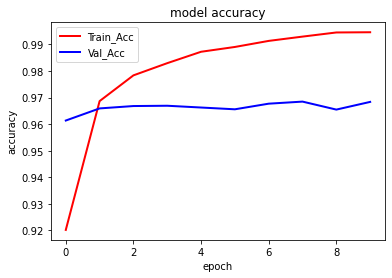

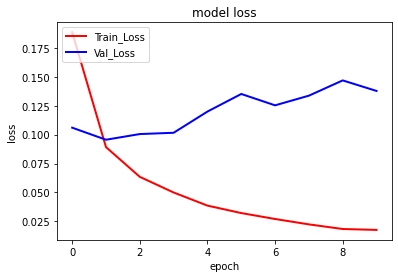

(None, None)

In [204]:
acc_plot(history),loss_plot(history)

In [205]:
print("Model Accuracy: {}%".format(round(accuracy_score(y_test,y_pred)*100,2)))
print("\nConfusion Matrix of DL Model:\n")
print(confusion_matrix(y_test,y_pred))
print("\nCLassification Report of DL Model:\n")
print(classification_report(y_test,y_pred))

Model Accuracy: 99.69%

Confusion Matrix of DL Model:

[[4702   21]
 [   7 4248]]

CLassification Report of DL Model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4723
           1       1.00      1.00      1.00      4255

    accuracy                           1.00      8978
   macro avg       1.00      1.00      1.00      8978
weighted avg       1.00      1.00      1.00      8978

